In [1]:
!python compile.py

running build_ext
copying build\lib.win-amd64-cpython-312\image_processing.cp312-win_amd64.pyd -> 
Removed existing file: modules\image_processing.cp312-win_amd64.pyd
Moved image_processing.cp312-win_amd64.pyd to modules

Success!


In [2]:
from modules import *

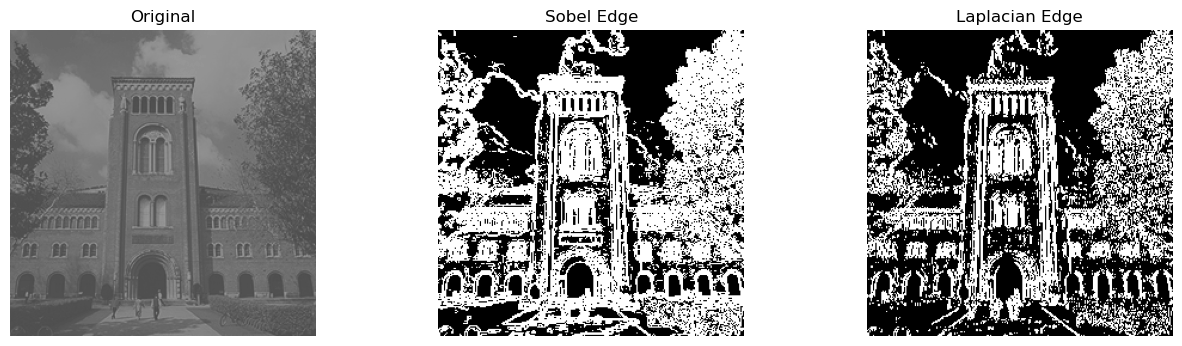

In [6]:
# Basic edge detection algorithms
building_img = Image(256, 256, 1)
building_img.load("images/HW2/building.raw")

building_sobel_edge = Image.sobel_edge(building_img, 0, 3, "none", "auto")
building_laplacian_edge = Image.laplacian_edge(building_img, 1, 3, 20)

show_images([building_img, building_sobel_edge, building_laplacian_edge], ["Original", "Sobel Edge", "Laplacian Edge"])

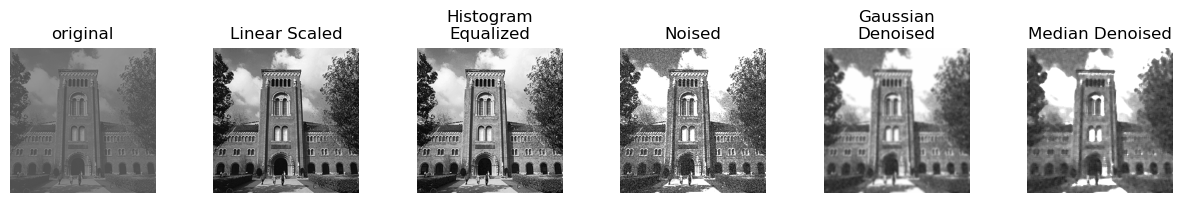

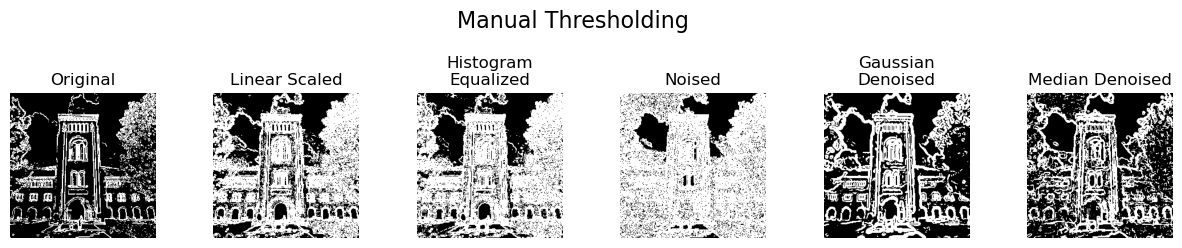

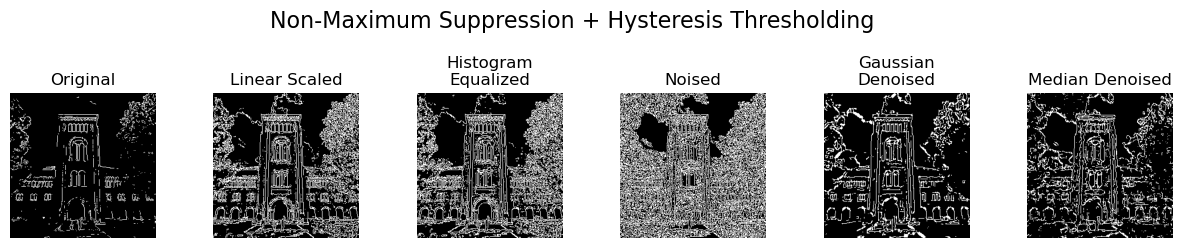

In [4]:
# Advanced edge detection algorithms
building_noise = Image(256, 256, 1)
building_noise.load("images/HW2/building_noise.raw")

## Pre-processing Techniques
building_img_Linear_scaled = Image.linear_scale(building_img, 0, 0, 255)
building_img_Hist_Equalized = Image.hist_equalize(building_img, 0, 64)

building_noise_gaussian = Image.gaussian_denoise(building_noise, 0, 11, 1.5)
building_noise_median = Image.median_denoise(building_noise, 0, 5)

show_images([building_img, building_img_Linear_scaled, building_img_Hist_Equalized, building_noise, building_noise_gaussian, building_noise_median], ["original", "Linear Scaled", "Histogram Equalized", "Noised", "Gaussian Denoised", "Median Denoised"])

## Post-processing Techniques
building_sobel_edge_non_maximum = Image.sobel_edge(building_img, 0, 3, "none", "manual", { "threshold": 60 })
building_linear_sobel_edge_non_maximum = Image.sobel_edge(building_img_Linear_scaled, 0, 3, "none", "manual", { "threshold": 60 })
building_hist_sobel_edge_non_maximum = Image.sobel_edge(building_img_Hist_Equalized, 0, 3, "none", "manual", { "threshold": 60 })

building_noise_sobel_edge_non_maximum = Image.sobel_edge(building_noise, 0, 3, "none", "manual", { "threshold": 60 })
building_gaussian_sobel_edge_non_maximum = Image.sobel_edge(building_noise_gaussian, 0, 3, "none", "manual", { "threshold": 60 })
building_median_sobel_edge_non_maximum = Image.sobel_edge(building_noise_median, 0, 3, "none", "manual", { "threshold": 60 })

show_images([building_sobel_edge_non_maximum, building_linear_sobel_edge_non_maximum, building_hist_sobel_edge_non_maximum, building_noise_sobel_edge_non_maximum, building_gaussian_sobel_edge_non_maximum, building_median_sobel_edge_non_maximum], ["Original", "Linear Scaled", "Histogram Equalized", "Noised", "Gaussian Denoised", "Median Denoised"], "Manual Thresholding")

building_sobel_edge_non_maximum = Image.sobel_edge(building_img, 0, 3, "non-maximum", "hysteresis", { "low_threshold": 120, "high_threshold": 200 })
building_linear_sobel_edge_non_maximum = Image.sobel_edge(building_img_Linear_scaled, 0, 3, "non-maximum", "hysteresis", { "low_threshold": 120, "high_threshold": 200 })
building_hist_sobel_edge_non_maximum = Image.sobel_edge(building_img_Hist_Equalized, 0, 3, "non-maximum", "hysteresis", { "low_threshold": 120, "high_threshold": 200 })

building_noise_sobel_edge_non_maximum = Image.sobel_edge(building_noise, 0, 3, "non-maximum", "hysteresis", { "low_threshold": 80, "high_threshold": 120 })
building_gaussian_sobel_edge_non_maximum = Image.sobel_edge(building_noise_gaussian, 0, 3, "non-maximum", "hysteresis", { "low_threshold": 80, "high_threshold": 120 })
building_median_sobel_edge_non_maximum = Image.sobel_edge(building_noise_median, 0, 3, "non-maximum", "hysteresis", { "low_threshold": 80, "high_threshold": 120 })

show_images([building_sobel_edge_non_maximum, building_linear_sobel_edge_non_maximum, building_hist_sobel_edge_non_maximum, building_noise_sobel_edge_non_maximum, building_gaussian_sobel_edge_non_maximum, building_median_sobel_edge_non_maximum], ["Original", "Linear Scaled", "Histogram Equalized", "Noised", "Gaussian Denoised", "Median Denoised"], "Non-Maximum Suppression + Hysteresis Thresholding")

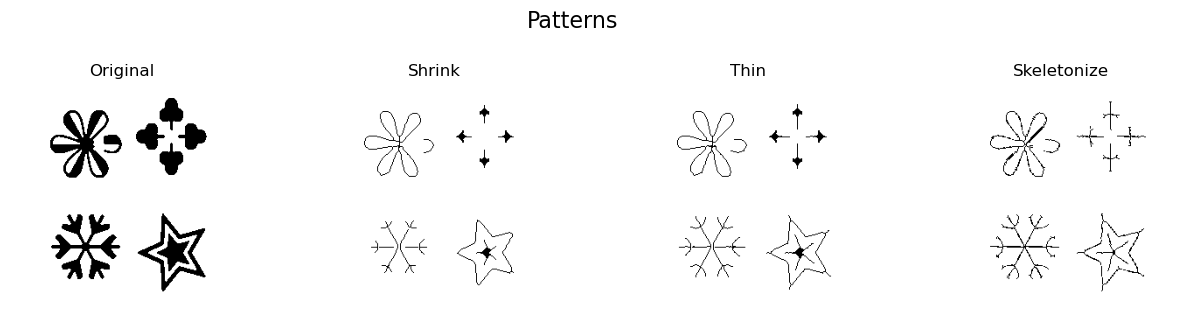

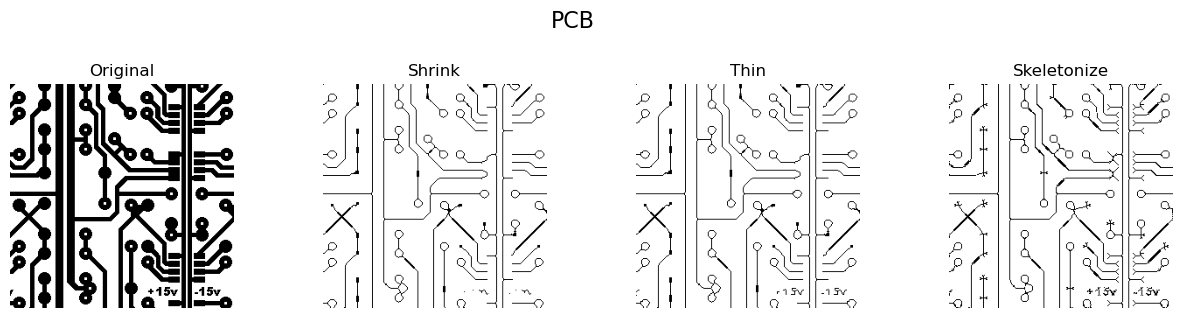

In [7]:
# Morphological Processing

patterns = Image(256, 256, 1)
patterns.load("images/HW2/patterns.raw")
patterns = Image.median_denoise(patterns, 0, 3)

patterns_shrink = Image.negative(Image.morph(Image.negative(patterns), 0, "shrink", 8))
patterns_thin = Image.negative(Image.morph(Image.negative(patterns), 0, "thin", 8))
patterns_skeletonize = Image.negative(Image.morph(Image.negative(patterns), 0, "skeletonize", 8))

show_images([patterns, patterns_shrink, patterns_thin, patterns_skeletonize], ["Original", "Shrink", "Thin", "Skeletonize"], "Patterns")

pcb = Image(256, 256, 1)
pcb.load("images/HW2/pcb.raw")

pcb_shrink = Image.negative(Image.morph(Image.negative(pcb), 0, "shrink", 6))
pcb_thin = Image.negative(Image.morph(Image.negative(pcb), 0, "thin", 6))
pcb_skeletonize = Image.negative(Image.morph(Image.negative(pcb), 0, "skeletonize", 6))

show_images([pcb, pcb_shrink, pcb_thin, pcb_skeletonize], ["Original", "Shrink", "Thin", "Skeletonize"], "PCB")